In [1008]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score

# DADOS

In [1009]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
yt = to_categorical(yt,2)


scalerx = MinMaxScaler().fit(xt)
xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [1010]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=10)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 

print(y_train)

sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_resample(X_train, y_train) 


print(y_train)
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
y_train = to_categorical(y_train,2)


# counterx=0
# countery=0
# increment = 4
# add = []
# for idx, i in enumerate(y_train):
#         if i[1] == 1:
#             counterx += increment
#             for k in range(0, increment-1):
#                 y_train = np.vstack((y_train, i))
#                 add = np.append(add, X_train[idx, :])
#         else: 
#              countery += 1
# X_train = np.append(X_train, add)
# print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

Before OverSampling, counts of label '1': [3404  535]
Before OverSampling, counts of label '0': [ 535 3404] 

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
After OverSampling, counts of label '1': [3404]
After OverSampling, counts of label '0': [3404]


# Apenas para ver as imagens

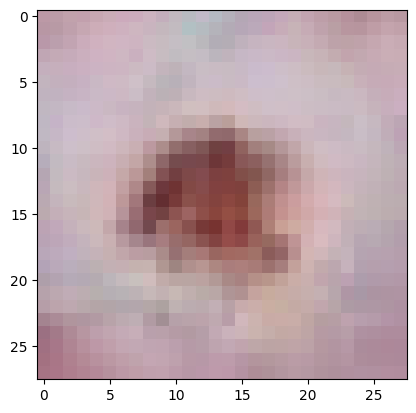

[[0. 1.]]


In [1011]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()
print(y_train[-1:])

# Código da Neural Network

In [1012]:
MLP = Sequential()
MLP.add(Convolution2D(8, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(16, (3,3),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(16, (3,3),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Flatten())
MLP.add(Dense(128,activation='relu'))
MLP.add(Dense(64,activation='relu'))
MLP.add(Dense(2, activation='softmax'))
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
# cnn1 = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.2),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.3),
#     Flatten(),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(10, activation='softmax')
# ])

In [1013]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_trainrs = X_train.reshape(-1, 28*28*3)

In [1014]:
MLP.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_227 (Conv2D)         (None, 28, 28, 8)         224       
                                                                 
 max_pooling2d_193 (MaxPool  (None, 14, 14, 8)         0         
 ing2D)                                                          
                                                                 
 conv2d_228 (Conv2D)         (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_194 (MaxPool  (None, 7, 7, 8)           0         
 ing2D)                                                          
                                                                 
 conv2d_229 (Conv2D)         (None, 7, 7, 16)          1168      
                                                                 
 max_pooling2d_195 (MaxPool  (None, 3, 3, 16)        

In [1015]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=4,
    min_lr=0.0001
)
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])

In [1016]:
Early_callback = EarlyStopping(monitor='val_loss', patience=9, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=32, callbacks=[lr_callback, Early_callback])

Epoch 1/50
213/213 - 4s - loss: 0.5526 - accuracy: 0.7087 - mse: 0.1907 - val_loss: 0.5637 - val_accuracy: 0.6323 - val_mse: 0.2009 - lr: 0.0010 - 4s/epoch - 19ms/step
Epoch 2/50
213/213 - 2s - loss: 0.4736 - accuracy: 0.7663 - mse: 0.1589 - val_loss: 0.4839 - val_accuracy: 0.7140 - val_mse: 0.1722 - lr: 0.0010 - 2s/epoch - 10ms/step
Epoch 3/50
213/213 - 2s - loss: 0.4430 - accuracy: 0.7842 - mse: 0.1470 - val_loss: 0.4087 - val_accuracy: 0.7596 - val_mse: 0.1455 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 4/50
213/213 - 2s - loss: 0.4227 - accuracy: 0.8039 - mse: 0.1388 - val_loss: 0.4550 - val_accuracy: 0.7158 - val_mse: 0.1645 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 5/50
213/213 - 2s - loss: 0.4146 - accuracy: 0.8070 - mse: 0.1357 - val_loss: 0.5368 - val_accuracy: 0.7140 - val_mse: 0.1864 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 6/50
213/213 - 2s - loss: 0.3914 - accuracy: 0.8221 - mse: 0.1272 - val_loss: 0.4274 - val_accuracy: 0.7738 - val_mse: 0.1483 - lr: 0.0010 - 2s/epoch - 10

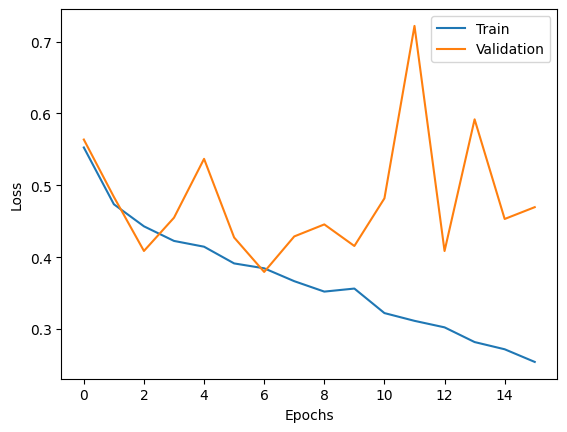

In [1017]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

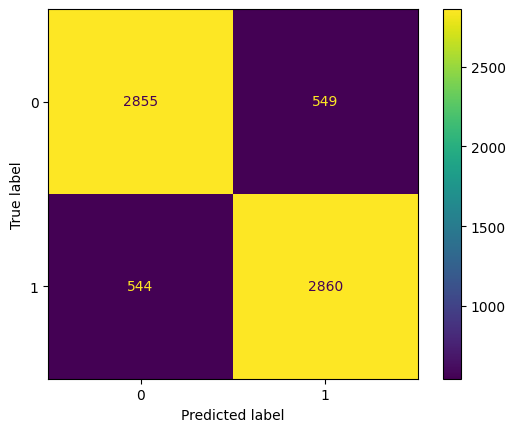

F1 -> 0.8395714076031117


In [1018]:
from sklearn.metrics import f1_score
y_predtrain = MLP.predict(X_trainrs, verbose=0)
y_predtrain = np.argmax(y_predtrain, axis=1)
cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp2.plot()
plt.show()
print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [1019]:

y_pred = MLP.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

20/20 [==============================] - 0s 5ms/step - loss: 0.3921 - accuracy: 0.7827 - mse: 0.1366
F1 -> 0.5142857142857143
Balanced ACC -> 0.7368082368082368
[[418 100]
 [ 36  72]]


In [1020]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

136

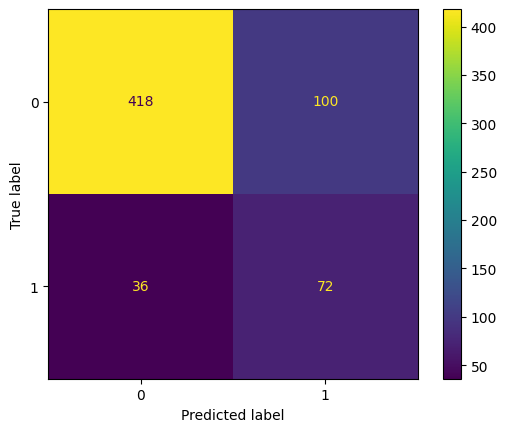

In [1021]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
